#**INTRODUCTION TO MACHINE LEARNING WITH PYTHON**

#**Part II: Predicting something we can**
 
Once we made clear that Machine Learning is not a tool we could use to predict absolutely anything, let's move on to use it to our advantage on things we actually can predict: sports results.
 
For this part of the excersice, I made a script to build a dataframe with dummy data of Tennis players that we can use Machine Learning to predict who would win on hipothetical games between them. Said dataframe is called *tennis_dataset.csv* and it's availible for download. The script itself (*tennis_matches.py*) has also been uploaded to the GitHub repository of this tutorial.
 
####**Why did I built a dataset with dummy data when we could just use real world data?**
Because it's a great way to practice. And once we see how Machine Learning works with our dummy data, it would be easier for us to use it with real world examples.

##**Step One:**
###**An overview on the dummy data creation.**
Once again I used the *random* module to generate our fake Tennis dataset.
 
First thing I did was creating a *TennisPlayer* class. Instances of this class have the following attributes at instantiation:
1. Name: *string*
2. Base skill: *float*, defaults to 15.
3. Court skill: *string* (court type), defaults to *None*.
4. Total games played: *integer*, defaults to 0.
5. Winning strike: *integer*, defaults to 0.
6. Losing strike: *integer*, defaults to 0
7. *Ego* (a self confidence state of mind sort of attribute): *float*, defaults to 0.
8. Match skill: *float*, defaults to base skill value.
 
Aside the *init*, the *TennisPlayer* class has two methods that adjusts the skill of the player for each match by fixing its previous skill with some calculations based on his/hers winning or losing strikes (which affects their *ego*) and their total games played, which no matter the outcome will raise their skill by a fraction of the total games played. In addition to that, if the game is set to be played in the player's *skill_court*, their base skill is pumped for that particular match, finally generating the *match_skill*.
 
The *random.choices* function is then fed with the selected players *match_skill* -after one additional fixation common to both players- as *weights*, a parameter of the *random.choices* function that temper the odds of the choice based on the numerical values of said weights without entirely ruling out the odds for the lesser weighted option.
 
With all of that set up, I made 200 random matches and saved the results as a .csv file: *tennis_dataframe.csv*.
 
In short, ***the tennis_dataframe* represents 200 tennis games from a group of six players with different skills, which fluctuates over time according to the players winnings, losings, total games played and, eventually, the court type where the game is held**.

###**The Players:**
In order to created the *tennis_dataset*, I instantiated six players from the TennisPlayers class and gave them the following starting attributes (attributes not specified were set to default):
 
• **Kurt Cobain**: *skill_court*: grass.
 
• **Jim Morrison**: *skill_court*: clay.
 
• **Brian Jones**.
 
• **Jimi Hendrix**: *base_skill*: 17; *skill_court*: hard.
 
• **Janis Joplin**: *base_skill*: 20.
 
• **Amy Winehouse**: *base_skill*: 13; *skill_court*: carpet.

###**The Dataset:**
As previously said, I made a function and randomly created two hundred matches, saving the results into a .csv file.
 
Let's import that .csv file and take a look so we get a better understanding of the results:

In [5]:
import pandas as pd
 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tennis_dataframe.csv')
df.head(15)

,Player 1,P1 base skill,P1 match skill,P1 previous games,Player 2,P2 base skill,P2 match skill,P2 previous games,Court,Winner
0,Janis Joplin,20.00,20.00,0,Amy Winehouse,13.00,13.00,0,grass,Janis Joplin
1,Jim Morrison,15.00,20.00,0,Amy Winehouse,12.85,12.85,1,clay,Jim Morrison
2,Kurt Cobain,15.00,15.00,0,Amy Winehouse,12.55,12.55,2,hard,Amy Winehouse
3,Amy Winehouse,12.90,17.90,3,Jim Morrison,15.25,15.25,1,carpet,Jim Morrison
4,Amy Winehouse,12.90,12.90,4,Jim Morrison,15.75,15.75,2,grass,Jim Morrison
5,Jimi Hendrix,17.00,17.00,0,Brian Jones,15.00,15.00,0,clay,Brian Jones
6,Janis Joplin,20.25,20.25,1,Brian Jones,15.25,15.25,1,grass,Janis Joplin
7,Brian Jones,15.15,15.15,2,Jimi Hendrix,16.85,21.85,1,hard,Brian Jones
8,Kurt Cobain,14.85,19.85,1,Brian Jones,15.50,15.50,3,grass,Brian Jones
9,Amy Winehouse,12.75,17.75,5,Jim Morrison,16.50,16.50,3,carpet,Jim Morrison


We displayed the first fifteen rows of the dataframe, and with a simple glance we can see how the winner of almost every match is the player with the highest *match skill*, even tho that rule is not 100% effective (see rows 2, 3, 5, 7, for example).
 
We also see how each player's *base skill* fluctuates either up or down based on their winning and losing history. We can also verify the *match skill* is pumped for the player that has said court as an attribute (Jim Morrison at row 1, Amy Winehouse at row 3, and Jimi Hendrix at row 7).
 
Of course, a player with a losing strike will have his/hers skill diminished further more each time, decreasing their chance to win again; the opposite effect will occur on players with a winning strike.

Just to clarify: We won't use the entire dataframe for our Machine Learning exercise, since there are columns that add little to no important data for the models to predict the result -winner-. It is presented here at its fullest to give the readers and idea on how the dataset was created and why the skill levels fluctuate as they do.

##**Step Two:**
###**Data exploration.**
Before we move forward to the Machine Learning part, let's do some data exploration and visualization with *Pandas*, *Matplotlib* and *Plotly*.
 
First, let's get rid of the columns we don't need, starting with the players previous games for now. Then, let's see if we get any interesting output with the *describe* method (remember the *describe* method only takes into consideration columns with numerical values).

In [6]:
df = df.drop(['P1 previous games', 'P2 previous games'], axis=1)
df.head()

,Player 1,P1 base skill,P1 match skill,Player 2,P2 base skill,P2 match skill,Court,Winner
0,Janis Joplin,20.0,20.0,Amy Winehouse,13.00,13.00,grass,Janis Joplin
1,Jim Morrison,15.0,20.0,Amy Winehouse,12.85,12.85,clay,Jim Morrison
2,Kurt Cobain,15.0,15.0,Amy Winehouse,12.55,12.55,hard,Amy Winehouse
3,Amy Winehouse,12.9,17.9,Jim Morrison,15.25,15.25,carpet,Jim Morrison
4,Amy Winehouse,12.9,12.9,Jim Morrison,15.75,15.75,grass,Jim Morrison


In [ ]:
df.describe()

,P1 base skill,P1 match skill,P2 base skill,P2 match skill
count,200.000000,200.00000,200.000000,200.000000
mean,53.339750,54.33975,52.171500,52.771500
std,41.105527,40.97139,38.946459,38.842152
min,6.000000,6.00000,6.000000,6.000000
25%,21.250000,21.61250,21.775000,22.325000
50%,39.125000,41.50000,40.125000,41.775000
75%,75.412500,75.47500,73.862500,73.862500
max,172.400000,172.40000,166.150000,166.150000


From the previous table there's not much we could use to form any valid opinion of the dataset, since every column has data from all the players.
 
Yet, it is quite interesting the *max* values, since no player started with more than 20 points of skill, **the highest skill went up to more than 170. Let's see who was it:

In [ ]:
max = df.loc[df['P1 match skill'] > 170]
max

,Player 1,P1 base skill,P1 match skill,Player 2,P2 base skill,P2 match skill,Court,Winner
196,Janis Joplin,172.4,172.4,Jim Morrison,83.4,83.4,grass,Janis Joplin


Well, aparently Janis Joplin had an amazing tennis record. Let's check out her performance by searching for her in both the Player 1 and Player 2 columns:

In [ ]:
janis1 = df.loc[df['Player 1'] == 'Janis Joplin']
janis2 = df.loc[df['Player 2'] == 'Janis Joplin']
janis = pd.concat([janis1, janis2])
janis

,Player 1,P1 base skill,P1 match skill,Player 2,P2 base skill,P2 match skill,Court,Winner
0,Janis Joplin,20.00,20.00,Amy Winehouse,13.00,13.00,grass,Janis Joplin
6,Janis Joplin,20.25,20.25,Brian Jones,15.25,15.25,grass,Janis Joplin
14,Janis Joplin,20.75,20.75,Brian Jones,17.40,17.40,carpet,Brian Jones
17,Janis Joplin,20.70,20.70,Amy Winehouse,11.40,11.40,hard,Janis Joplin
20,Janis Joplin,21.10,21.10,Brian Jones,18.65,18.65,hard,Brian Jones
...,...,...,...,...,...,...,...,...
173,Jimi Hendrix,122.65,122.65,Janis Joplin,134.90,134.90,grass,Janis Joplin
176,Kurt Cobain,91.20,91.20,Janis Joplin,144.20,144.20,clay,Janis Joplin
181,Brian Jones,132.35,132.35,Janis Joplin,151.65,151.65,hard,Janis Joplin
183,Jimi Hendrix,136.45,141.45,Janis Joplin,160.10,160.10,hard,Jimi Hendrix


 We got 64 matches where Janis Joplin played either as Player 1 or Player 2. Let's see if we can find any match where she actually lost:

In [ ]:
janis_lost = janis.loc[janis['Winner'] != 'Janis Joplin']
len(janis_lost)

11

Surprisingly, out of 66 matches, Janis only lost eleven times. Well done, Ms. Joplin.
 
Let's now look for the less fortunate players, those who got a match skill of six (which was set as a top minimum skill on the script):

In [ ]:
min1 = df.loc[df['P1 match skill'] == 6]
min2 = df.loc[df['P2 match skill'] == 6]
min = pd.concat([min1, min2])
min

,Player 1,P1 base skill,P1 match skill,Player 2,P2 base skill,P2 match skill,Court,Winner
34,Amy Winehouse,6.00,6.00,Jimi Hendrix,22.10,22.10,clay,Jimi Hendrix
35,Amy Winehouse,6.00,6.00,Kurt Cobain,15.65,15.65,hard,Kurt Cobain
38,Amy Winehouse,6.00,6.00,Jimi Hendrix,24.35,29.35,hard,Jimi Hendrix
51,Amy Winehouse,6.00,6.00,Janis Joplin,32.15,32.15,clay,Janis Joplin
52,Amy Winehouse,6.00,6.00,Jimi Hendrix,28.65,28.65,grass,Jimi Hendrix
62,Amy Winehouse,6.00,6.00,Kurt Cobain,22.55,22.55,hard,Kurt Cobain
77,Amy Winehouse,6.00,6.00,Brian Jones,35.55,35.55,clay,Brian Jones
78,Amy Winehouse,6.00,6.00,Brian Jones,37.30,37.30,hard,Brian Jones
81,Amy Winehouse,6.00,6.00,Brian Jones,39.30,39.30,grass,Brian Jones
86,Amy Winehouse,6.00,6.00,Brian Jones,45.80,45.80,hard,Amy Winehouse


Amy Winehouse is the only one of our 27 Club to get the lowest possible skill. Let's see how was she overall:

In [ ]:
amy1 = df.loc[df['Player 1'] == 'Amy Winehouse']
amy2 = df.loc[df['Player 2'] == 'Amy Winehouse']
amy = pd.concat([amy1, amy2])
amy_lost = amy.loc[amy['Winner'] != 'Amy Winehouse']
len(amy), len(amy_lost)

(69, 62)

Out of sixty nine matches, Amy Winehouse lost sixty two, so she only got seven victories. Better luck next time, Amy.

Let's plot all of the players base skill evolution thought the tournament (I guess we can call it that).
 
As the skill scales progressively within the dataset, plotting each of the players skill for both his or her position as Player 1 and Player 2 would be redundant.
 
See, for instance, how would Janis Joplin's skill would stack onto itself if we do it like this:

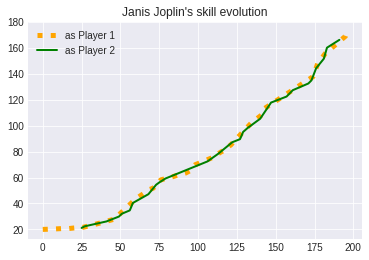

In [ ]:
import matplotlib.pyplot as plt
 
plt.plot(janis1['P1 base skill'], label='as Player 1', color='orange', linewidth=5, linestyle='dotted')
plt.plot(janis2['P2 base skill'], label='as Player 2', color='green', linewidth=2)
plt.legend()
plt.style.use('_classic_test_patch')
plt.title("Janis Joplin's skill evolution")
plt.show()

In order to avoid this repetition while loosing the less possible data, we need to plot each player's skill from their position in their last match, be it as either Player 1 or 2.
 
Let's see the last rows of our dataset with the *Pandas* *tail* method and pinpoint each player's last appearance:

In [ ]:
df.tail(10)

,Player 1,P1 base skill,P1 match skill,Player 2,P2 base skill,P2 match skill,Court,Winner
190,Amy Winehouse,64.00,64.00,Jim Morrison,77.15,77.15,grass,Jim Morrison
191,Jimi Hendrix,150.35,150.35,Janis Joplin,166.15,166.15,carpet,Jimi Hendrix
192,Jimi Hendrix,153.90,153.90,Kurt Cobain,101.90,101.90,carpet,Jimi Hendrix
193,Brian Jones,141.75,141.75,Jim Morrison,80.45,85.45,clay,Brian Jones
194,Brian Jones,145.65,145.65,Jimi Hendrix,157.70,157.70,grass,Brian Jones
195,Janis Joplin,169.05,169.05,Amy Winehouse,65.65,65.65,clay,Janis Joplin
196,Janis Joplin,172.40,172.40,Jim Morrison,83.40,83.40,grass,Janis Joplin
197,Amy Winehouse,67.15,67.15,Brian Jones,149.80,149.80,hard,Brian Jones
198,Amy Winehouse,68.50,73.50,Brian Jones,154.20,154.20,carpet,Brian Jones
199,Amy Winehouse,69.70,69.70,Jim Morrison,86.20,91.20,clay,Jim Morrison


 
Both Amy Winehouse and Janis Joplin played as Player 1 in their last matches (we already had separated their gaming history), while he rest of the group played as Player 2. That's how we need to filter each of them with the *loc* method as we did with Janis and Amy before.

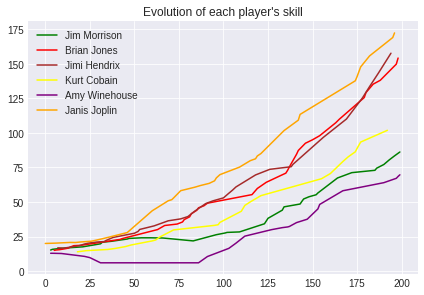

In [ ]:
morrison2 = df.loc[df['Player 2'] == 'Jim Morrison']
jones2 = df.loc[df['Player 2'] == 'Brian Jones']
hendrix2 = df.loc[df['Player 2'] == 'Jimi Hendrix']
cobain2 = df.loc[df['Player 2'] == 'Kurt Cobain']
 
 
plt.plot(morrison2['P2 base skill'], label='Jim Morrison', color='green')
plt.plot(jones2['P2 base skill'], label='Brian Jones', color ='red')
plt.plot(hendrix2['P2 base skill'], label='Jimi Hendrix', color ='brown')
plt.plot(cobain2['P2 base skill'], label='Kurt Cobain', color ='yellow')
plt.plot(amy1['P1 base skill'], label='Amy Winehouse', color ='purple')
plt.plot(janis1['P1 base skill'], label='Janis Joplin', color ='orange')
plt.style.use('seaborn-darkgrid')
plt.tight_layout()
plt.legend()
plt.title("Evolution of each player's skill")
plt.show()

Just as we did with Janis Joplin and Amy Winehouse, let's see (and graph) the performance of each player, plotting their total matches against their losts:

In [ ]:
morrison1 = df.loc[df['Player 1'] == 'Jim Morrison']
morrison = pd.concat([morrison1, morrison2])
morrison_lost = morrison.loc[morrison['Winner'] != 'Jim Morrison']
jones1 = df.loc[df['Player 1'] == 'Brian Jones']
jones = pd.concat([jones1, jones2])
jones_lost = jones.loc[jones['Winner'] != 'Brian Jones']
hendrix1 = df.loc[df['Player 1'] == 'Jimi Hendrix']
hendrix = pd.concat([hendrix1, hendrix2])
hendrix_lost = hendrix.loc[hendrix['Winner'] != 'Jimi Hendrix']
cobain1 = df.loc[df['Player 1'] == 'Kurt Cobain']
cobain = pd.concat([cobain1, cobain2])
cobain_lost = cobain.loc[cobain['Winner'] != 'Kurt Cobain']
 
print(f'Jim Morrison: {len(morrison)} matches, lost {len(morrison_lost)} games.')
print(f'Brian Jones: {len(jones)} matches, lost {len(jones_lost)} games.')
print(f'Jimi Hendrix: {len(hendrix)} matches, lost {len(hendrix_lost)} games.')
print(f'Kurt Cobain: {len(cobain)} matches, lost {len(cobain_lost)} games.')
print(f'Janis Joplin: {len(janis)} matches, lost {len(janis_lost)} games.')
print(f'Amy Winehouse: {len(amy)} matches, lost {len(amy_lost)} games.')

Jim Morrison: 65 matches, lost 47 games.
Brian Jones: 73 matches, lost 29 games.
Jimi Hendrix: 69 matches, lost 19 games.
Kurt Cobain: 60 matches, lost 32 games.
Janis Joplin: 64 matches, lost 11 games.
Amy Winehouse: 69 matches, lost 62 games.


Let's make a table with this data:

In [ ]:
players_stats = [{'Name': 'Jim Morrison', 'Games Played': len(morrison),
                   'Wins': len(morrison) - len(morrison_lost), 'Lost': len(morrison_lost)},
                   {'Name': 'Brian Jones', 'Games Played': len(jones),
                   'Wins': len(jones) - len(jones_lost), 'Lost': len(jones_lost)},
                   {'Name': 'Jimi Hendrix', 'Games Played': len(hendrix),
                   'Wins': len(hendrix) - len(hendrix_lost), 'Lost': len(hendrix_lost)},
                   {'Name': 'Kurt Cobain', 'Games Played': len(cobain),
                   'Wins': len(cobain) - len(cobain_lost), 'Lost': len(cobain_lost)},
                   {'Name': 'Janis Joplin', 'Games Played': len(janis),
                   'Wins': len(janis) - len(janis_lost), 'Lost': len(janis_lost)},
                   {'Name': 'Amy Winehouse', 'Games Played': len(amy),
                   'Wins': len(amy) - len(amy_lost), 'Lost': len(amy_lost)}]
 
stats = pd.DataFrame(players_stats)
stats

,Name,Games Played,Wins,Lost
0,Jim Morrison,65,18,47
1,Brian Jones,73,44,29
2,Jimi Hendrix,69,50,19
3,Kurt Cobain,60,28,32
4,Janis Joplin,64,53,11
5,Amy Winehouse,69,7,62


In [ ]:
import plotly.express as px
 
fig = px.bar(stats, x='Name', y='Wins', color='Lost',
            title='Victories vs. defeats', hover_data=['Games Played'])
fig.show()

From the figure above, it is quite clear Janis Joplin was the most successful player of the group, whereas Amy Winehouse had the poorest performance. The graphic shows a 1:1 correlation with the line chart we did previously with each players' match skills, proving both features -match skill and performance- are linked with each other.

We now have a very good understanding of our data, we saw how each member of the 27s Club performed in our tournament. We could even make some predictions ourselves, since the players skills, even tho started rather close to each other, evolved quite differently as matches went by.

Let's move on then to the next part of the exercise.

##**Step Three:**
###**Preprocessing the data**
 
The goal of this exercise is to provide a Machine Learning algorithm with the name of two of our players and to get a trustful prediction on who would win. As pointed out before, that would be extremely easy even for us just by watching each of the players skill for said match, so let's try something a little harder -for us, at least- and remove from the dataset the skills columns altogether:

In [7]:
df = df.drop(['P1 base skill', 'P1 match skill', 'P2 base skill', 'P2 match skill'], axis=1)
df

,Player 1,Player 2,Court,Winner
0,Janis Joplin,Amy Winehouse,grass,Janis Joplin
1,Jim Morrison,Amy Winehouse,clay,Jim Morrison
2,Kurt Cobain,Amy Winehouse,hard,Amy Winehouse
3,Amy Winehouse,Jim Morrison,carpet,Jim Morrison
4,Amy Winehouse,Jim Morrison,grass,Jim Morrison
...,...,...,...,...
195,Janis Joplin,Amy Winehouse,clay,Janis Joplin
196,Janis Joplin,Jim Morrison,grass,Janis Joplin
197,Amy Winehouse,Brian Jones,hard,Brian Jones
198,Amy Winehouse,Brian Jones,carpet,Brian Jones


Let's also combine the *Player 1* and *Player 2* columns into a new *Players* column.
 
(All of these will make sense in a second, I promise)

In [8]:
player1 = [player for player in df['Player 1'].tolist()]
player2 = [player for player in df['Player 2'].tolist()]
players = []
for i in range(len(player1)):
    pair = [player1[i], player2[i]]
    pair.sort()
    pair_str = str(pair[0]) + ', ' + str(pair[1])
    players.append(pair_str)
df['Players'] = players
df = df[['Players', 'Court', 'Winner']] #rearranging columns order in the dataframe
df.head()

,Players,Court,Winner
0,"Amy Winehouse, Janis Joplin",grass,Janis Joplin
1,"Amy Winehouse, Jim Morrison",clay,Jim Morrison
2,"Amy Winehouse, Kurt Cobain",hard,Amy Winehouse
3,"Amy Winehouse, Jim Morrison",carpet,Jim Morrison
4,"Amy Winehouse, Jim Morrison",grass,Jim Morrison


What we did above was to get both names of each match and wrap them up into a single column named 'Players' yet they appear sorted in said column, hence every match that had, for example, Amy Winehouse against Janis Joplin will appear now with the names in that order, regardless of which one of them was actually Player 1 and Player 2. Same goes to every other possible combination.
 
We can verify this just by searching the reverse order in the column with Pandas *loc* method. We should get no results:

In [ ]:
joplin_winehouse = df.loc[df['Players'] == 'Janis Joplin, Amy Winehouse']
joplin_winehouse

,Players,Court,Winner


Machine Learning classification models -the ones we'll be using in this exercise- require that any categorical data we use as input to converted to numerical values.
 
We achieve this with the *Scikit Learn* *LabelEncoder* tool:

In [10]:
 from sklearn.preprocessing import LabelEncoder

In the fewer possible words, each of our Tennis player's names and court types is a *label* which needs to be converted into a *numerical value* in order to train our models. Otherwise we'll get a *ValueError* from *Skicit Learn*. The *LabelEncoder* class has several methods that will help us make such conversions back and forth.

In [12]:
le = LabelEncoder()
encoded_players = le.fit(df['Players'])
df['Encoded Players'] = encoded_players.transform(df['Players'])
encoded_courts = le.fit(df['Court'])
df['Encoded Court'] = encoded_courts.transform(df['Court'])
 
df.head()

,Players,Court,Winner,Encoded Players,Encoded Court
0,"Amy Winehouse, Janis Joplin",grass,Janis Joplin,1,2
1,"Amy Winehouse, Jim Morrison",clay,Jim Morrison,2,1
2,"Amy Winehouse, Kurt Cobain",hard,Amy Winehouse,4,3
3,"Amy Winehouse, Jim Morrison",carpet,Jim Morrison,2,0
4,"Amy Winehouse, Jim Morrison",grass,Jim Morrison,2,2


In [13]:
players_12 = df.loc[df['Encoded Players'] == 12]
players_12.head()

,Players,Court,Winner,Encoded Players,Encoded Court
21,"Jim Morrison, Jimi Hendrix",carpet,Jim Morrison,12,0
24,"Jim Morrison, Jimi Hendrix",carpet,Jimi Hendrix,12,0
29,"Jim Morrison, Jimi Hendrix",carpet,Jim Morrison,12,0
33,"Jim Morrison, Jimi Hendrix",carpet,Jimi Hendrix,12,0
37,"Jim Morrison, Jimi Hendrix",clay,Jimi Hendrix,12,1


As you may see, we have added to our original dataframe four new columns labeled 'Encoded Players' and 'Encoded Court', each of said columns filled with integers.
 
A closer look into these four columns will confirm that for each number correspond to an specific string label for players combination, and court types (Jim Morrison vs. Jimi Hendrix was always set to 12, whereas *carpet* courts were encoded to 0 every time and so forth).
 
However, our dataframe seems a little too crowded now with the additional columns. Let's split those columns into a second dataframe named *encoded_df*:

In [14]:
encoded_df = pd.DataFrame()
encoded_df['Players'] = df['Encoded Players']
encoded_df['Court'] = df['Encoded Court']
encoded_df['Winner'] = df['Winner']
encoded_df.head()

,Players,Court,Winner
0,1,2,Janis Joplin
1,2,1,Jim Morrison
2,4,3,Amy Winehouse
3,2,0,Jim Morrison
4,2,2,Jim Morrison


Now we can of course drop those columns out of our original dataframe:

In [15]:
df = df.drop(['Encoded Players', 'Encoded Court'], axis=1)
df.head()

,Players,Court,Winner
0,"Amy Winehouse, Janis Joplin",grass,Janis Joplin
1,"Amy Winehouse, Jim Morrison",clay,Jim Morrison
2,"Amy Winehouse, Kurt Cobain",hard,Amy Winehouse
3,"Amy Winehouse, Jim Morrison",carpet,Jim Morrison
4,"Amy Winehouse, Jim Morrison",grass,Jim Morrison


Neat, now we have two dataframes with the same data: one categorical and one encoded.
 
That said, we can of course decode back the *numerical values* into their original categorical correspondents using the *inverse_transform* method from the *LabelEncoder* class:

In [16]:
encoded_df['Court Names'] = encoded_courts.inverse_transform(encoded_df['Court'])
encoded_df.head()

,Players,Court,Winner,Court Names
0,1,2,Janis Joplin,grass
1,2,1,Jim Morrison,clay
2,4,3,Amy Winehouse,hard
3,2,0,Jim Morrison,carpet
4,2,2,Jim Morrison,grass


We could of course do the same with the players names, yet it's rather pointless.
 
Instead, let's drop the recently created 'Court Names' column, save the encoded_df dataframe and move on with the final -and most awaited- part of the excercise: using Machine Learning.

In [17]:
encoded_df = encoded_df.drop(['Court Names'], axis=1)
encoded_df.to_csv('/content/drive/MyDrive/Colab Notebooks/tennis_encoded.csv', index=False)
encoded_df.head()

,Players,Court,Winner
0,1,2,Janis Joplin
1,2,1,Jim Morrison
2,4,3,Amy Winehouse
3,2,0,Jim Morrison
4,2,2,Jim Morrison


##**Step Three:**
###**Using Machine Learning to make predictions**
We have finally make it here. Let's jump right into it by importing the necessary methods and setting up the variables that will be common for all of the Machine Learning algorithms we are about to test.
 
**We will use classification algorithms** for this excercise, since we are attempting to predict a categorical output -winner-.
 
Also, keep in mind we are using our *encoded_df*.

In [18]:
encoded_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tennis_encoded.csv')
encoded_df.head()

,Players,Court,Winner
0,1,2,Janis Joplin
1,2,1,Jim Morrison
2,4,3,Amy Winehouse
3,2,0,Jim Morrison
4,2,2,Jim Morrison


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
 
X = encoded_df.drop('Winner', axis=1)[30:]
 
y = encoded_df['Winner'][30:] 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

As you may see, I left the first 29 rows of the dataframe out of the training set, because in the early rows the players skill were still a thing in development, so feeding those early stages of the tournamen. **That means we are using less data to train our models, yet the data is more significant, thus the result should be more accurate**. Keep in mind that, regarding data, quality is better than quantity.

###**Support Vector Classifier:**

In [28]:
from sklearn import svm
 
clf = svm.SVC(class_weight='balanced')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
accuracy = accuracy_score(y_test, predictions)
precision, accuracy

(0.32941176470588235, 0.29411764705882354)

###**K Neighbors Classifier:**

In [29]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(weights='distance')
model.fit(X_train, y_train)
predictions= model.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
accuracy = accuracy_score(y_test, predictions)
precision, accuracy

(0.8382352941176471, 0.7058823529411765)

###**Radius Neighbor Classifier:**

In [30]:
from sklearn.neighbors import RadiusNeighborsClassifier 
model = KNeighborsClassifier(weights='distance')
model.fit(X_train, y_train)
predictions= model.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
accuracy = accuracy_score(y_test, predictions)
precision, accuracy

(0.8382352941176471, 0.7058823529411765)

###**Decision Tree Classifier:**

In [31]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions= model.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
accuracy = accuracy_score(y_test, predictions)
precision, accuracy

(0.8970588235294118, 0.8235294117647058)

###**Random Forest Classifier:**

In [32]:
from sklearn.ensemble import RandomForestClassifier
 
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions= model.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
accuracy = accuracy_score(y_test, predictions)
precision, accuracy

(0.8382352941176471, 0.7058823529411765)

With the exception of the Support Vector Classifier, all of the models performed very well, with an accuracy score over .8, meaning the predictions were correct over 80% of the times.
 
**The Decision Tree Classifier model was the more accurate with a .89 precision score and .82 accuracy score.**

##**Step Four:**
###**Is there an step four?**
We tried several models with more than satisfying results from most of them.
 
The next step would be saving the model we'd like to keep as is, in order to use it in the future. Otherwise we'd have to train the model every time we'd like to make some predictions (remember we did actually make predictions this time, with the split of data we separate for testing).
 
In Python, a good way to save the trained model for future use is to make a pickle object from it. [*Pickle*](https://docs.python.org/3/library/pickle.html) is a module for data serialization. Yet, that is a topic for another tutorial, so for now that is all.
 
**Thanks for reading this.**

#**About me:**
I'm a self taught programmer from Argentina. Aside other projects, I make Jupyter Notebooks based tutorials on several Python's subjects, both in English and Spanish.
 
I put a lot of time and effort on these tutorials, because they are intended to potencially helping others, and they are also a great way to refresh things I've learned and even learning new ones.
 
**You may find all of my tutorials on my [GitHub](https://github.com/dan-almenar?tab=repositories) page**.
 
##**There are several ways for you to help me keep doing this**:
 
• You may **share this tutorial** with someone you'd think it will help.
 
• You can **make a one time contribution** via [Ko-fi](https://ko-fi.com/dandev).
 
• You can **make a monthly contribution** via [Patreon](https://www.patreon.com/dandeveloper).
 
###If you want to contact me regarding this tutorial or any other subject you think I may help you with, click [here](danielalmenar@gmail.com).
 
**Thanks!**
 
###**Dan Almenar**